# **Movies Dataset EDA Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Import & Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AIIITS/EDA/Movies.csv')
df.head()

,movie_id,title,vote_average,vote_count,status,release_date,revenue,adult,budget,imdb_id,original_language,original_title,overview,popularity,genres,production_companies,production_countries,spoken_languages
0,4520010,Inception,8.364,34495,Released,7/15/2010,825532764,False,160000000,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,4520011,Interstellar,8.417,32571,Released,11/5/2014,701729206,False,165000000,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,4520012,The Dark Knight,8.512,30619,Released,7/16/2008,1004558444,False,185000000,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,4520013,Avatar,7.573,29815,Released,12/15/2009,2923706026,False,237000000,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,4520014,The Avengers,7.710,29166,Released,4/25/2012,1518815515,False,220000000,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


# **About Dataset**
The Movies dataset is a comprehensive collection of movie-related information designed to provide valuable insights into various films. It includes the following key attributes:

- **Identifiers:** Unique identifiers for each movie, ensuring easy reference and retrieval.
- **Title and Overview:** Essential details about the movie, including its title and a brief summary.
- **Ratings and Votes:** Information on the movie's average rating and total votes, reflecting audience reception.
- **Financials:** Data on the movie's budget and revenue, allowing analysis of its financial performance.
- **Release and Status:** Details about the release date and current status (e.g., released, upcoming).
- **Demographics:** Indicators of whether the movie is suitable for adults.
- **Language and Production:** Information on the original language, production companies, and countries involved in the film's creation.
- **Genres and Popularity:** Classification of the movie into genres and a popularity score, providing context on its cultural impact.

Overall, this dataset serves as a valuable resource for analyzing trends, performance, and characteristics of films within the cinema industry.

Here’s the metadata below:

- movie_id: Unique identifier for each movie.
- title: Title of the movie.
- vote_average: Average rating of the movie (e.g., from 0 to 10).
- vote_count: Total number of votes the movie has received.
- status: Status of the movie (e.g., "Released", "Planned").
- release_date: Release date of the movie.
- revenue: Total revenue generated by the movie.
- adult: Indicates whether the movie is for adults (true/false).
- budget: Budget for the movie production.
- imdb_id: Unique identifier for the movie on IMDb.
- original_language: Language in which the movie was originally produced.
- original_title: Original title of the movie (if different from the main title).
- overview: Brief summary or description of the movie.
- popularity: Popularity score of the movie, often based on various factors.
- genres: Comma-separated list of genres associated with the movie.
- production_companies: Comma-separated list of companies that produced the movie.
- production_countries: Comma-separated list of countries where the movie was produced.
- spoken_languages: Comma-separated list of languages spoken in the movie.

## Data Preparation & Cleaning
- Remove duplicates
- Fix missing/incorrect values
- Get more insights about the data and columns

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   movie_id              1048575 non-null  int64  
 1   title                 1048562 non-null  object 
 2   vote_average          1048575 non-null  float64
 3   vote_count            1048575 non-null  int64  
 4   status                1048575 non-null  object 
 5   release_date          899153 non-null   object 
 6   revenue               1048575 non-null  int64  
 7   adult                 1048575 non-null  bool   
 8   budget                1048575 non-null  int64  
 9   imdb_id               576991 non-null   object 
 10  original_language     1048575 non-null  object 
 11  original_title        1048562 non-null  object 
 12  overview              850351 non-null   object 
 13  popularity            1048575 non-null  float64
 14  genres                646292 non-n

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['movie_id'].duplicated().sum()

0

In [ ]:
df['title'].duplicated().sum()

146075

This is because there are series of movies or sequel with the same name but they are actually different movies.

In [ ]:
df.drop(columns ='movie_id', inplace = True) # because this is just the count implemented

In [ ]:
df[df['title'].isna()]

,title,vote_average,vote_count,status,release_date,revenue,adult,budget,imdb_id,original_language,original_title,overview,popularity,genres,production_companies,production_countries,spoken_languages
389398,NaN,0.0,0,Canceled,NaN,0,False,0,NaN,en,NaN,NaN,0.600,"Horror, Mystery, Thriller",NaN,United States of America,English
398811,NaN,0.0,0,Released,3/2/2008,0,False,0,NaN,en,NaN,NaN,0.600,Documentary,NaN,United States of America,NaN
432098,NaN,0.0,0,Post Production,NaN,0,False,0,NaN,en,NaN,NaN,0.600,Science Fiction,NaN,United States of America,English
453014,NaN,0.0,0,Released,NaN,0,False,0,NaN,en,NaN,NaN,0.600,Documentary,NaN,NaN,NaN
453017,NaN,0.0,0,Released,NaN,0,False,0,NaN,en,NaN,NaN,0.600,NaN,NaN,NaN,NaN
580188,NaN,0.0,0,Released,NaN,0,False,0,NaN,en,NaN,NaN,0.000,NaN,NaN,NaN,NaN
620096,NaN,0.0,0,Released,NaN,0,False,0,NaN,en,NaN,NaN,0.600,NaN,NaN,NaN,NaN
623095,NaN,0.0,0,Released,NaN,0,True,0,NaN,en,NaN,"“My Body, My Rules, and Them” is an exploratio...",0.750,NaN,NaN,NaN,NaN
623321,NaN,0.0,0,Released,5/21/2021,0,False,0,NaN,en,NaN,A hitman is tasked to take out ex-mobsters whe...,0.861,NaN,NaN,NaN,NaN
680659,NaN,0.0,0,Released,NaN,0,False,0,NaN,en,NaN,"In this directorial debut of Eden Ewardson, he...",0.000,NaN,NaN,NaN,Burmese


There are 13 movies having no title with them. Most of the other columns are null as well. As they won't help us in the analysis, we can drop them.

In [ ]:
df = df[~df['title'].isna()]

In [ ]:
df.describe()

,vote_average,vote_count,revenue,budget,popularity
count,1.048562e+06,1.048562e+06,1.048562e+06,1.048562e+06,1.048562e+06
mean,2.024892e+00,2.045398e+01,7.395269e+05,2.860877e+05,1.294019e+00
std,3.084167e+00,3.315691e+02,1.846230e+07,5.124808e+06,7.891276e+00
min,0.000000e+00,0.000000e+00,-1.200000e+01,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,8.960000e-01
max,1.000000e+01,3.449500e+04,3.000000e+09,9.000000e+08,2.994357e+03


`revenue` column has one value -12. This is an anomaly of the data. Also other numeric columns are not having real values. They're just filled with zeros. E.g., 75 percent of values in `budget` column are 0. There are also missing values as well. In the next segment we calculate percentage of missing values for each column. Also visualising of missing values would help us really understand the missing values of a column.

In [ ]:
missing_percentages = df.isnull().sum().sort_values(ascending=False)/ len(df)
missing_percentages

,0
production_companies,0.534707
imdb_id,0.449731
production_countries,0.425382
spoken_languages,0.408589
genres,0.383644
overview,0.189035
release_date,0.142493
revenue,0.000000
adult,0.000000
budget,0.000000


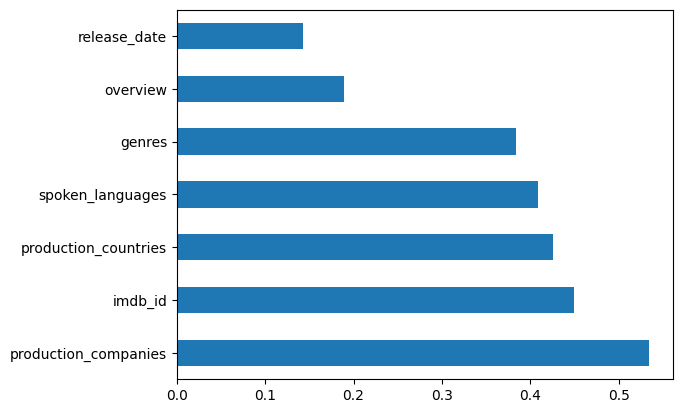

In [ ]:
missing_percentages[missing_percentages > 0].plot(kind='barh')
plt.show()

Any column with more than 50 percent of the values missing won't really convey the full picture of the data. We can simply drop those columns as they're not helpful.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048562 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   title                 1048562 non-null  object 
 1   vote_average          1048562 non-null  float64
 2   vote_count            1048562 non-null  int64  
 3   status                1048562 non-null  object 
 4   release_date          899149 non-null   object 
 5   revenue               1048562 non-null  int64  
 6   adult                 1048562 non-null  bool   
 7   budget                1048562 non-null  int64  
 8   imdb_id               576991 non-null   object 
 9   original_language     1048562 non-null  object 
 10  original_title        1048562 non-null  object 
 11  overview              850347 non-null   object 
 12  popularity            1048562 non-null  float64
 13  genres                646287 non-null   object 
 14  production_companies  487889 non-null  

The `df.info()` function gives us a high level summary of the data. We can see the name of the columns and number of non-null values for each column as well as their datatypes. This helps us figure out if we need to type convert any column to make if more useful. E.g., column `release_date` is of `string` type that needs to be converted into `datetime` column.

In [ ]:
# converting to datetime column
df['release_date']= pd.to_datetime(df['release_date'], format= 'mixed')

In [ ]:
len(df[df['budget']!=0])

53887

In [ ]:
df['imdb_id'].isnull().sum()

471571

For `budget` column only 53887 rows having the correct value and rest everything is 0, which is not possible. The `imdb_id` should uniquely represent one single movie but in our case there are 471571 null values present. Going forward we will not use this `imdb_id` column in our analysis.

In [ ]:
df['original_language'].value_counts()

,count
original_language,
en,568389
fr,63059
es,53492
de,50948
ja,46306
...,...
ii,1
gv,1
ki,1


There are 174 different langauges present in our dataset. Majority of movies are made in `en` language.

In [ ]:
df.head()

,title,vote_average,vote_count,status,release_date,revenue,adult,budget,imdb_id,original_language,original_title,overview,popularity,genres,production_companies,production_countries,spoken_languages
0,Inception,8.364,34495,Released,2010-07-15,825532764,False,160000000,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,Interstellar,8.417,32571,Released,2014-11-05,701729206,False,165000000,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,False,185000000,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,Avatar,7.573,29815,Released,2009-12-15,2923706026,False,237000000,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,The Avengers,7.710,29166,Released,2012-04-25,1518815515,False,220000000,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [ ]:
df.genres.isnull().sum()/len(df)

0.38364445783844925

38% of values are missing in `genres` column. Also wherever there is data present in the `genres` column usually multiple genres are given. This is also an anomaly.

In [ ]:
df.describe()

,vote_average,vote_count,release_date,revenue,budget,popularity
count,1.048562e+06,1.048562e+06,899149,1.048562e+06,1.048562e+06,1.048562e+06
mean,2.024892e+00,2.045398e+01,1999-12-07 15:58:04.819089920,7.395269e+05,2.860877e+05,1.294019e+00
min,0.000000e+00,0.000000e+00,1800-01-01 00:00:00,-1.200000e+01,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1989-02-03 00:00:00,0.000000e+00,0.000000e+00,6.000000e-01
50%,0.000000e+00,0.000000e+00,2010-08-30 00:00:00,0.000000e+00,0.000000e+00,6.000000e-01
75%,5.000000e+00,1.000000e+00,2018-10-22 00:00:00,0.000000e+00,0.000000e+00,8.960000e-01
max,1.000000e+01,3.449500e+04,2099-11-18 00:00:00,3.000000e+09,9.000000e+08,2.994357e+03
std,3.084167e+00,3.315691e+02,NaN,1.846230e+07,5.124808e+06,7.891276e+00


### **Conclusion on Data Preparation and Cleaning**

- **Removed `movie_id` Column**: This column was deemed unhelpful.
- **Duplicate Titles**: Movies with duplicate titles are recognized as sequels.
- **Rows with Null Values**: A small number of rows were eliminated due to all values being null.
- **Numeric Anomalies**: Anomalies were found in numeric columns, with most values being zero.
- **Language Variety**: There are 174 different languages represented in the dataset.
- **Focus of the Project**: As this project is centered on exploratory data analysis (EDA) and not predictive modeling, we will not be removing anomalies or outliers.
- **Next Steps**: We will explore the available data to extract useful insights.

## Exploratory Analysis & Visualization


In [ ]:
df['status'].value_counts()

,count
status,
Released,1027134
In Production,8042
Post Production,6922
Planned,5884
Rumored,300
Canceled,280


The `status` column contains categorical values such as Released, In Production, Post Production, Planned, Rumored, and Canceled. For our analysis, we will focus exclusively on movies that have been released, as those that are not yet available do not provide significant insights. Therefore, we will create a new dataframe called `released_movies`, which includes only the films that have already been released.

In [ ]:
# filter only released movies
released_movies = df[df['status']=='Released']

# filter non released movies
non_released_movies = df[df['status']!='Released']

print(released_movies.shape)
print(non_released_movies.shape)

(1027134, 17)
(21428, 17)


In [ ]:
released_movies[released_movies.duplicated()]

,title,vote_average,vote_count,status,release_date,revenue,adult,budget,imdb_id,original_language,original_title,overview,popularity,genres,production_companies,production_countries,spoken_languages
262346,İki Parça,8.0,1,Released,2017-04-11,0,False,0,tt6787130,tr,İki Parça,NaN,0.60,"Drama, Crime",NaN,Turkey,"English, Turkish"
262670,My First Porno 6,6.0,1,Released,2016-12-20,0,True,0,NaN,en,Mi Primer Porno 6,Sasha Jones: New girl for hire! Alice Romain:...,0.00,NaN,Culioneros,United States of America,English
262671,My First Porno 6,6.0,1,Released,2016-12-20,0,True,0,NaN,en,Mi Primer Porno 6,Sasha Jones: New girl for hire! Alice Romain:...,0.00,NaN,Culioneros,United States of America,English
262696,My First Porno 6,6.0,1,Released,2016-12-20,0,True,0,NaN,en,Mi Primer Porno 6,Sasha Jones: New girl for hire! Alice Romain:...,0.00,NaN,Culioneros,United States of America,English
264414,Mr. Kobayashi,10.0,1,Released,NaT,0,False,10,NaN,de,Mr. Kobayashi,NaN,0.63,"Action, Drama",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020650,movie,0.0,0,Released,NaT,0,True,0,NaN,en,movie,aaaaaaaaaaaaaaaaaaaaaaaaaa,0.60,NaN,NaN,NaN,NaN
1024604,Happy Video Privat 18,0.0,0,Released,NaT,0,True,0,NaN,de,Happy Video Privat 18,NaN,0.60,NaN,NaN,NaN,NaN
1025650,Karma: The Interactive Movie,0.0,0,Released,2019-11-23,0,False,10,NaN,ar,Karma: The Interactive Movie,After finding a note that makes you kill peopl...,0.60,NaN,NaN,NaN,NaN
1032045,postcard,0.0,0,Released,2020-11-29,0,False,0,NaN,en,postcard,a journey into the night,0.60,NaN,NaN,NaN,NaN


It appears that there are 601 completely duplicated rows, which can be removed without issue.

In [ ]:
released_movies.drop_duplicates(inplace=True)

In [ ]:
# 0 -> number of missing values
# 1 -> missing percentage

pd.concat([released_movies.isnull().sum().sort_values(ascending=False), released_movies.isnull().sum().sort_values(ascending=False)/len(released_movies)], axis=1)

,0,1
production_companies,550945,0.536705
imdb_id,457907,0.446071
production_countries,437617,0.426306
spoken_languages,421843,0.410940
genres,396087,0.385849
overview,193100,0.188109
release_date,134004,0.130540
revenue,0,0.000000
adult,0,0.000000
budget,0,0.000000


We are once again examining the number and percentage of missing values for each column in the newly created dataframe. This will assist us in planning our next steps.

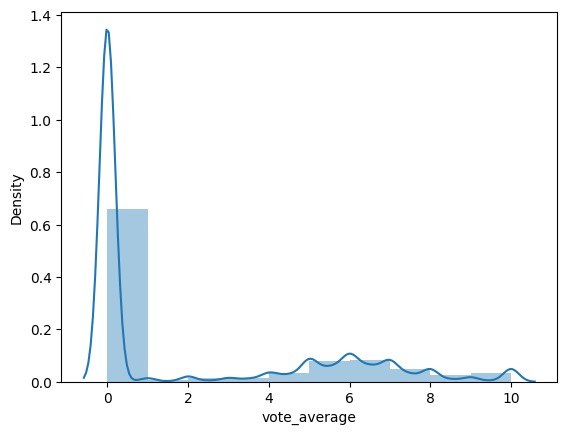

In [ ]:
sns.distplot(released_movies['vote_average'], bins= 10)
plt.show()

In [ ]:
len(released_movies[released_movies['vote_average']==0])

678043

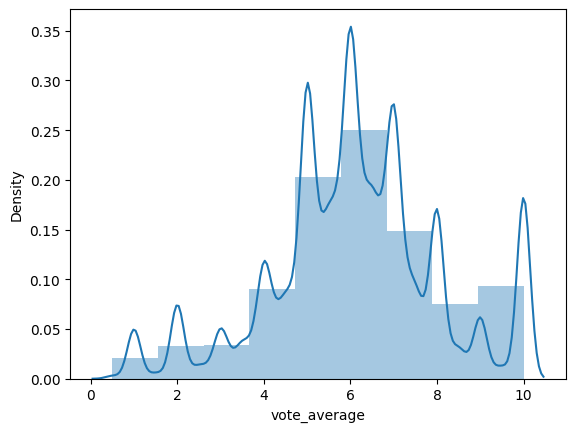

In [ ]:
# without considering count of 0
sns.distplot(released_movies[released_movies['vote_average']!=0]['vote_average'], bins=9)
plt.show()

The `vote_average` column indicates the rating of each movie. In our dataset, most values are 0, which seems unusual, as they do not reflect actual ratings. As a result, our distribution plot is highly right-skewed. However, if we exclude the zeros, the plot reveals an almost normal distribution of the data.

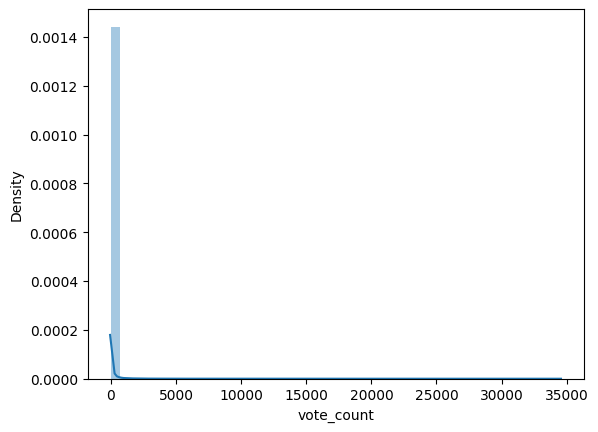

In [ ]:
sns.distplot(released_movies['vote_count'])
plt.show()

In [ ]:
len(released_movies[released_movies['vote_count']==0])/len(released_movies)

0.6602642097234088

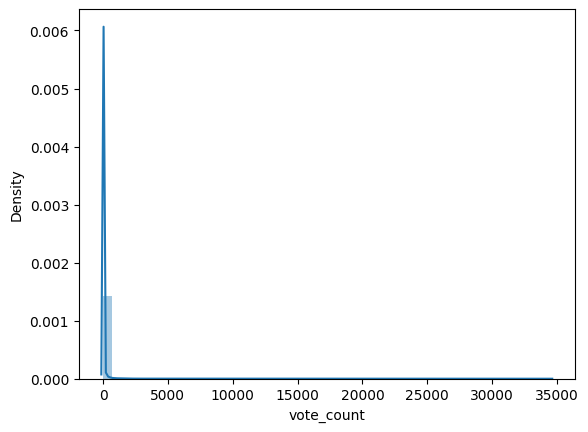

In [ ]:
# without considering count of 0
sns.distplot(released_movies[released_movies['vote_count']!=0]['vote_count'])
plt.show()

The next column, `vote_count`, represents the total number of votes, as the name implies. Similar to the previous column, most values are 0(66% of values), resulting in a right-skewed distribution of the data.

In [ ]:
# wrong values
released_movies['release_date'].dt.year.value_counts().sort_index().tail(15)

,count
release_date,
2020.0,34817
2021.0,42395
2022.0,43504
2023.0,39801
2024.0,11708
2025.0,28
2026.0,5
2027.0,2
2028.0,1


In [ ]:
released_movies = released_movies[(released_movies['release_date'].dt.year < 2024) | (released_movies['release_date'].isnull())]

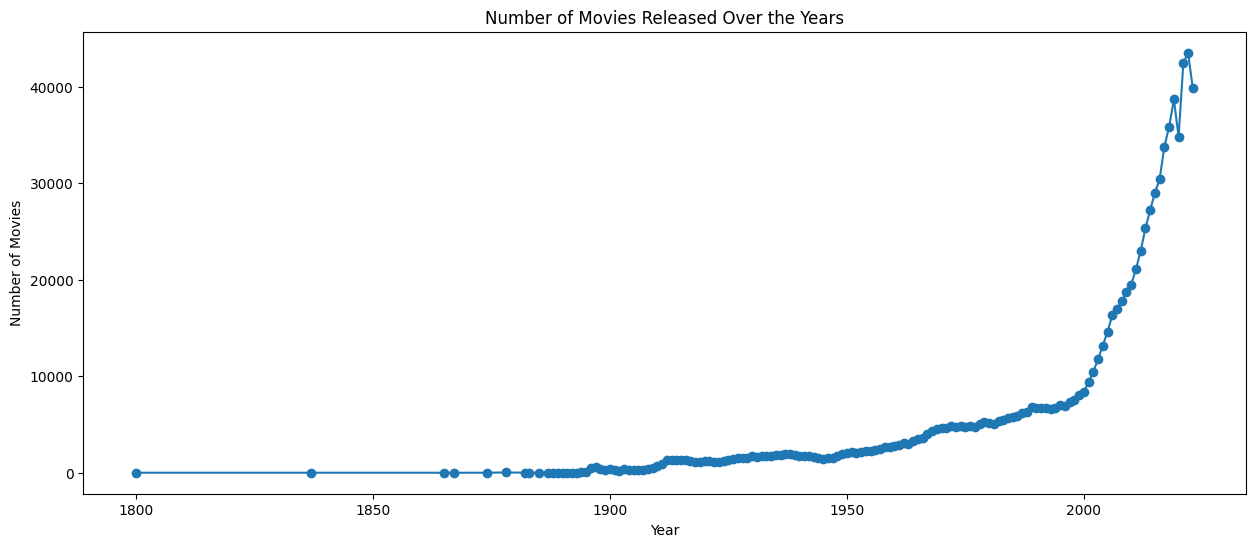

In [ ]:
year_wise_movie_count = released_movies['release_date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(15,6))
plt.plot(year_wise_movie_count.index, year_wise_movie_count.values, marker = 'o')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Over the Years')
plt.show()

Upon analyzing the `release_date` column, we discovered that it contains some release years extending to 2025, 2026, and even as far as 2061, which is clearly inaccurate. We will remove these rows and reconstruct our dataframe.

Later, we plotted a line chart illustrating the number of movies released each year(till 2023), which clearly shows the trend.

In [ ]:
released_movies['revenue'].describe()

,revenue
count,1.014783e+06
mean,7.525255e+05
std,1.826579e+07
min,-1.200000e+01
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,3.000000e+09


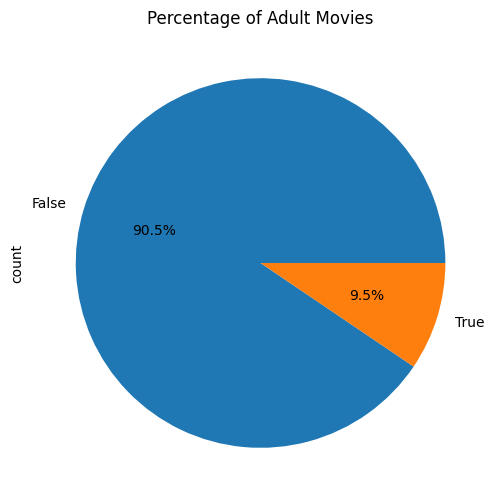

In [ ]:
released_movies['adult'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Percentage of Adult Movies')
plt.show()

In the dataset, 9.5% of the movies are categorized as adult films. This aspect warrants further investigation to determine whether they are legitimate movies or merely pornographic content, although we may not have sufficient data for a thorough analysis.

In [ ]:
released_movies['budget'].describe()

,budget
count,1.014783e+06
mean,2.855327e+05
std,5.009646e+06
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,9.000000e+08


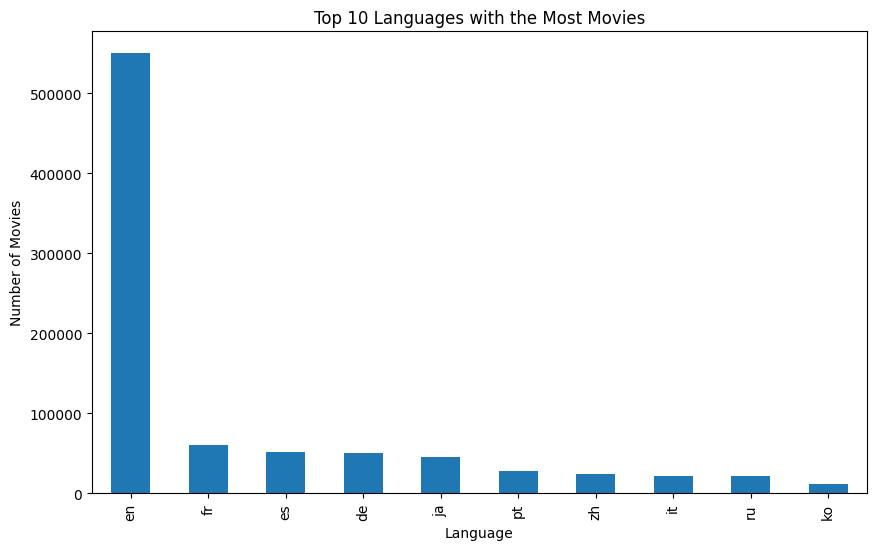

In [ ]:
plt.figure(figsize=(10,6))
released_movies['original_language'].value_counts().head(10).plot.bar()
plt.ylabel('Number of Movies')
plt.xlabel('Language')
plt.title('Top 10 Languages with the Most Movies')
plt.show()

As shown in the plot, the largest number of movies in the dataset are in English, totaling around 55,000. This is followed by French, Spanish, German, and Japanese films, which make up the top five languages represented in the data.

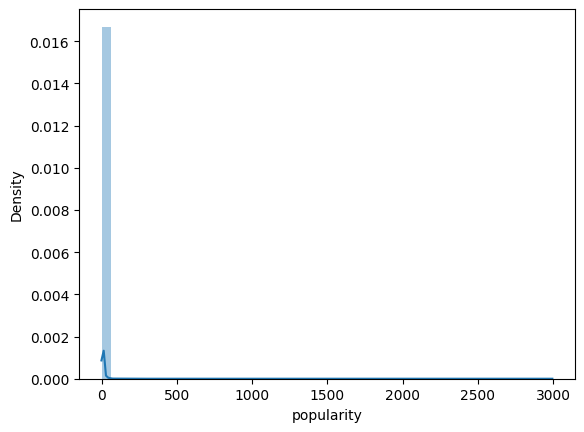

In [ ]:
sns.distplot(released_movies['popularity'], norm_hist=True)
plt.show()

In [ ]:
#percentage of missing values in the 'popularity' column
len(released_movies[released_movies['popularity']==0])/len(released_movies)

0.09033162754992939

In the `popularity` column, most of the values are also 0. This column provides a popularity score for each movie, and the distribution of the data is right-skewed.

In [ ]:
released_movies['production_countries'].value_counts().head(10)

,count
production_countries,
United States of America,164481
Japan,38005
United Kingdom,31130
Germany,30506
France,30056
India,18236
Canada,17527
Brazil,14014
Italy,12545


In [ ]:
released_movies['production_companies'].value_counts()

,count
production_companies,
Evil Angel,2790
ONF | NFB,2108
BBC,2031
Metro-Goldwyn-Mayer,2011
Columbia Pictures,1917
...,...
"Pedro Costa P. C., José Esteban Alenda",1
"American Playhouse, Playhouse International Pictures, Samuel Goldwyn Company",1
"Petarda Production, Moravia Steel, Filmpark Production, RTVS, FilmWorx Studios",1


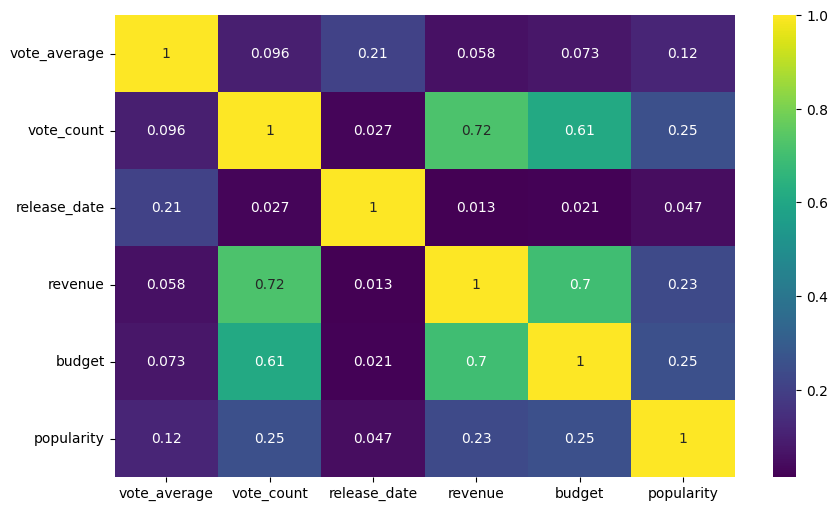

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(released_movies[released_movies.describe().columns].corr(),cmap='viridis', annot=True)
plt.show()

Correlation measures the relationship between two variables, with a coefficient ranging from -1 to 1. A value close to 1 indicates a strong positive correlation, while a value near -1 signifies a strong negative correlation. A coefficient around 0 suggests little to no linear relationship, making correlation useful for identifying patterns in data.

### **Conclusion of EDA**

In our exploratory data analysis, we identified the following key findings:

- **Focus on Released Movies**: Further analysis will concentrate only on movies that have been released.
- **Zero Values in Numeric Columns**: A significant number of zero values in numeric columns leads to a highly skewed distribution, warranting further investigation.
- **Language Distribution**: The majority of movies are in English.
- **Adult Movie Classification**: A considerable number of movies are classified as adult films; however, the dataset lacks sufficient data to support this beyond the `adult` column.
- **Inaccurate Release Years**: Rows with erroneous release years (2025, 2026, and up to 2061) have been removed to ensure valid analysis.
- **Correlation Insights**: The correlation plot shows that most columns exhibit weak correlations, while `revenue` and `vote_count` have a strong correlation, as expected. There is also a high correlation between `budget` and `revenue` for obvious reasons.

## Ask & Answer Questions
1. Top 10 popular movies?
2. Top 10 popular movies of `english` language?
3. Top 10 highest rated movies?
4. Top 10 highest rated movies with at least 25000 `vote_count`?
5. How many `hindi` movies are there in the relesed dataset?
6. Top 5 `genres`?
7. Which time of the year most movies are released?
8. Correlation of rating(`vote_average`) and `popularity`?
9. Which popular movies have the biggest `budget`?
10. India's top 5 most popular movies name?
11. India's top 5 most rated movies(considering at least 1000 votes)?
12. Which genres are most popular in India?
13. Which genres are most popular in the US?
14. What are the most frequent `genres` of adult movies?
15. What is the name of the production company that has highest average popularity?
16. Are more movies released on weekdays or weekends?
17. Top 10 most spoken languages in the realeased movies?
18. Does `revenue` increase when `vote_count` increases?
19. Top 5 countries with highest rated movies?

In [ ]:
#Question 1. Top 10 popular movies?
released_movies.sort_values(by='popularity', ascending=False)[['title','popularity']].head(10)

,title,popularity
3868,Blue Beetle,2994.357
5048,Gran Turismo,2680.593
51086,A Female Boss with Big Tits and Her Cherry Boy...,2020.286
7919,The Nun II,1692.778
2130,Meg 2: The Trench,1567.273
9963,Retribution,1547.220
4018,Talk to Me,1458.514
1110,Fast X,1175.267
6394,Sound of Freedom,1111.036
825,Barbie,1069.340


In [ ]:
#Question 2. Top 10 popular movies of english language?
released_movies[released_movies['original_language']=='en'].sort_values(by='popularity', ascending=False)[['title','popularity']].head(10)

,title,popularity
3868,Blue Beetle,2994.357
5048,Gran Turismo,2680.593
7919,The Nun II,1692.778
2130,Meg 2: The Trench,1567.273
9963,Retribution,1547.220
4018,Talk to Me,1458.514
1110,Fast X,1175.267
6394,Sound of Freedom,1111.036
825,Barbie,1069.340
1799,Elemental,1008.942


In [ ]:
#Question 3. Top 10 highest rated movies?
released_movies.sort_values(by='vote_average', ascending=False)[['title','vote_average']].head(10)

,title,vote_average
151627,"Something Like, Something Like It",10.0
244121,Accusation Of The Wall,10.0
243802,Full Body Workout,10.0
243804,My First Big Black Cock 4,10.0
318065,Conversations of a Marriage,10.0
243810,Ding Jun Shan,10.0
243812,Half,10.0
318063,Solitary,10.0
318061,Good-Bye Mr. Moth,10.0
243842,Ransom,10.0


In [ ]:
#Question 4. Top 10 highest rated movies with at least 25000 vote_count?
released_movies[released_movies['vote_count']>=25000].sort_values(by='vote_average', ascending=False)[['title','vote_average','vote_count']].head(10)

,title,vote_average,vote_count
2,The Dark Knight,8.512,30619
9,Pulp Fiction,8.488,25893
10,Forrest Gump,8.477,25409
7,Fight Club,8.438,27238
1,Interstellar,8.417,32571
0,Inception,8.364,34495
6,Avengers: Infinity War,8.255,27713
11,Harry Potter and the Philosopher's Stone,7.916,25379
8,Guardians of the Galaxy,7.906,26638
4,The Avengers,7.710,29166


In [ ]:
#Question 5. How many hindi movies are there in the relesed dataset?
released_movies[released_movies['original_language']=='hi'].shape[0]

7202

In [ ]:
#Question 6. Top 5 genres?
released_movies['genres'].str.split(',').explode().str.strip().value_counts().head()

,count
genres,
Drama,206653
Documentary,150706
Comedy,127909
Animation,52431
Romance,49416


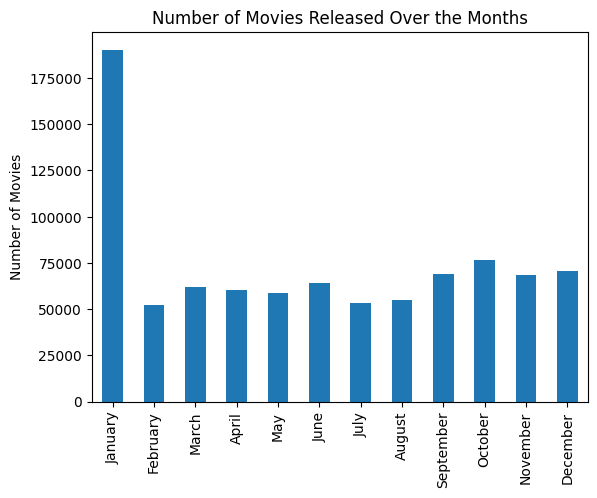

In [ ]:
#Question 7. Which time of the year most movies are released?
ticks = range(0,12)
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
released_movies['release_date'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.xticks(ticks=ticks, labels=labels)
plt.xlabel('')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Over the Months')
plt.show()

<Axes: xlabel='release_date'>

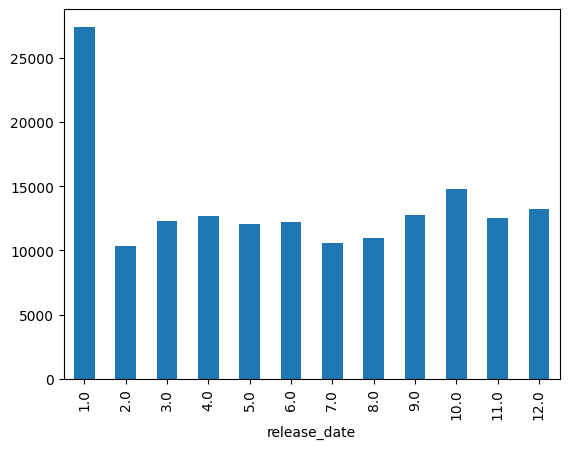

In [ ]:
released_movies[released_movies['production_countries']=='United States of America']['release_date'].dt.month.value_counts().sort_index().plot(kind='bar')

According to the dataset, it appears that most movies are released in January. However, this doesn't align with findings from other sources, such as Google. Upon closer examination, we observe the same trend in the country-wise distribution of released movies. Additionally, the number of missing values in our dataset suggests that the actual release data may not be accurately captured. There could be other contributing factors as well, indicating a need for further investigation.

<Axes: xlabel='vote_average', ylabel='popularity'>

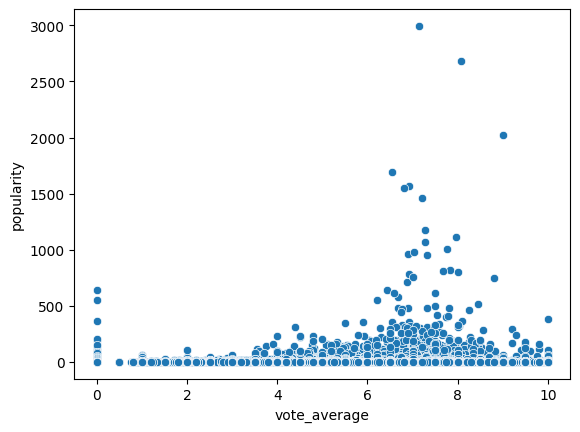

In [ ]:
#Question 8. Correlation of rating(vote_average) and popularity?
sns.scatterplot(data=released_movies, x='vote_average', y='popularity')

In [ ]:
released_movies[['vote_average', 'popularity']].corr()

,vote_average,popularity
vote_average,1.000000,0.116803
popularity,0.116803,1.000000


There is a very weak correlation between the `vote_average` and `popularity` columns. This suggests that a higher movie rating does not necessarily guarantee popularity; in fact, some low-rated movies can also achieve high popularity.

In [ ]:
#Question 9. Which popular movies have the biggest budget?
released_movies.sort_values(by=['popularity', 'budget'], ascending=False)[['title','popularity','budget']].head(10)

,title,popularity,budget
3868,Blue Beetle,2994.357,120000000
5048,Gran Turismo,2680.593,60000000
51086,A Female Boss with Big Tits and Her Cherry Boy...,2020.286,0
7919,The Nun II,1692.778,38500000
2130,Meg 2: The Trench,1567.273,129000000
9963,Retribution,1547.220,20000000
4018,Talk to Me,1458.514,4500000
1110,Fast X,1175.267,340000000
6394,Sound of Freedom,1111.036,15000000
825,Barbie,1069.340,145000000


In [ ]:
#Question 10. India's top 5 most popular movies name?
released_movies[released_movies['production_countries']=='India'].sort_values(by='popularity', ascending=False)[['title','popularity']].head(5)

,title,popularity
26811,Adipurush,349.287
124981,Amigos,306.964
38115,Janatha Garage,103.971
23263,Jawan,52.487
3732,RRR,40.751


In [ ]:
#Question 11. India's top 5 most rated movies(considering at least 1000 votes)?
released_movies[(released_movies['production_countries']=='India') & (released_movies['vote_count']>=1000)].sort_values(by='vote_average', ascending=False)[['title','vote_average','vote_count']].head(5)


,title,vote_average,vote_count
991,Dilwale Dulhania Le Jayenge,8.552,4256
2020,3 Idiots,7.984,2154
3827,Like Stars on Earth,7.976,1037
3732,RRR,7.811,1068


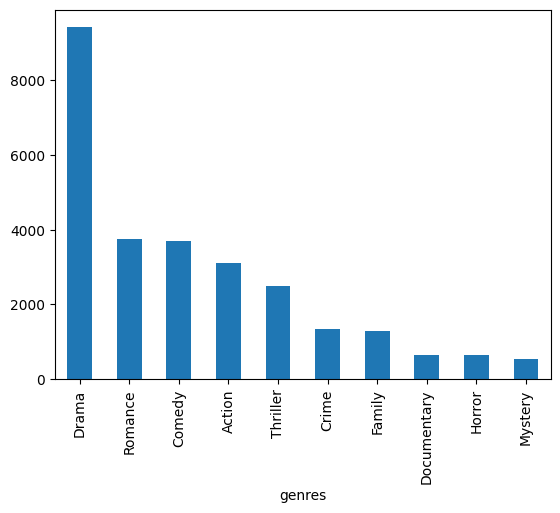

In [ ]:
#Question 12. Which genres are most popular in India?
indian_movies = released_movies[released_movies['production_countries']=='India']
indian_movies['genres'].str.split(',').explode().str.strip().value_counts().head(10).plot.bar()
plt.show()

Drama is the most popular genre in India and worldwide as well.

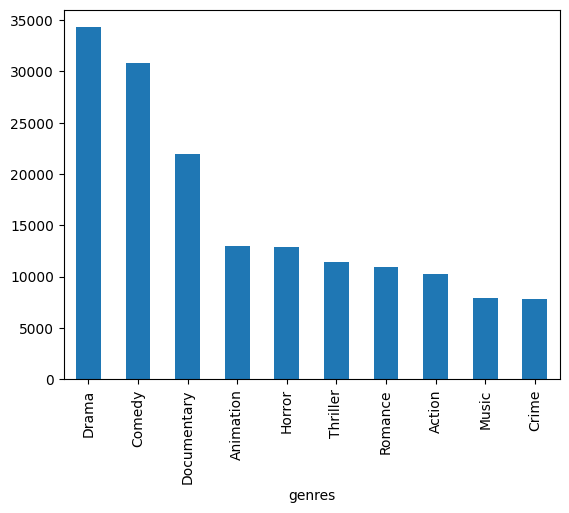

In [ ]:
#Question 13. Which genres are most popular in the US?
us_movies = released_movies[released_movies['production_countries']=='United States of America']
us_movies['genres'].str.split(',').explode().str.strip().value_counts().head(10).plot.bar()
plt.show()

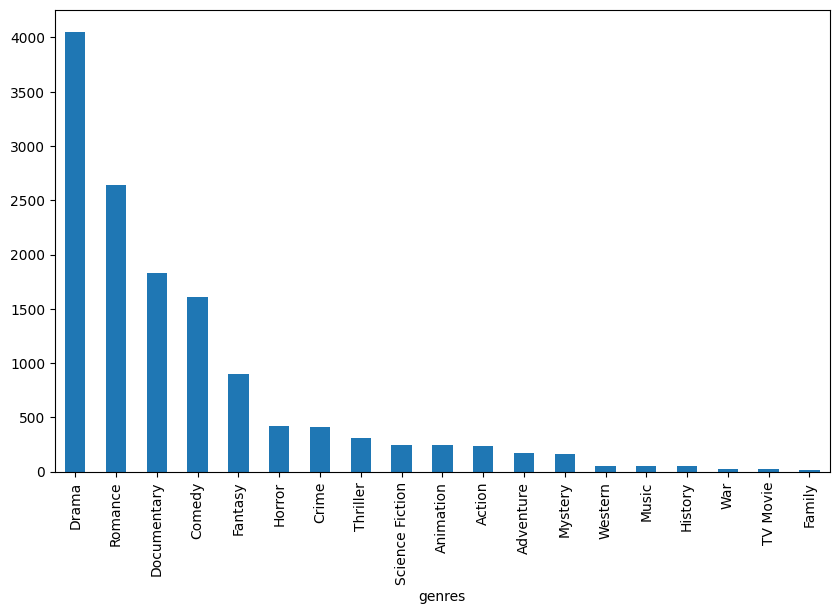

In [ ]:
#Question 14. What are the most frequent genres of adult movies?
plt.figure(figsize=(10,6))
adult_movies = released_movies[released_movies['adult']==True]
adult_movies['genres'].str.split(',').explode().str.strip().value_counts().plot.bar()
plt.show()

In [ ]:
#Question 15. What is the name of the production company that has highest average popularity?

company_count = released_movies['production_companies'].str.split(',').explode().str.strip()
merged_df = pd.merge(left=released_movies, right=company_count, how='inner', left_index= True, right_index=True)
merged_df.groupby('production_companies_y')['popularity'].mean().sort_values(ascending=False).head(5)

,popularity
production_companies_y,
Onaroll Productions,1567.27300
DF Pictures,1567.27300
Apelles Entertainment,834.35200
PlayStation Productions,690.51775
NB/GG Pictures,542.14250


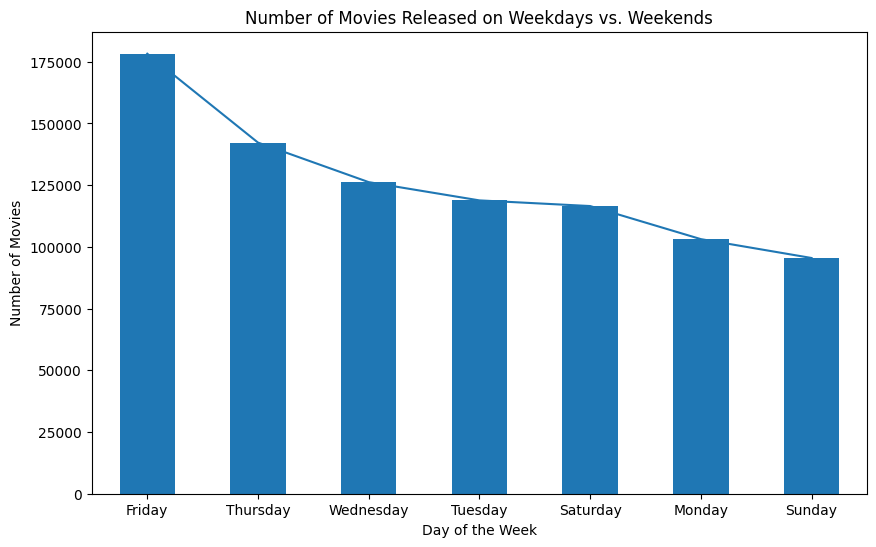

In [ ]:
#Question 16. Are more movies released on weekdays or weekends?
plt.figure(figsize=(10,6))
released_movies['release_date'].dt.day_name().value_counts().plot(kind='bar')
released_movies['release_date'].dt.day_name().value_counts().plot()
plt.xlabel('Day of the Week')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released on Weekdays vs. Weekends')
plt.show()

Most movies are released on Fridays to attract audiences looking for fresh content for the upcoming weekend. This trend is observed globally.

In [ ]:
#Question 17. Top 10 most spoken languages in the realeased movies?
released_movies['spoken_languages'].str.split(',').explode().str.strip().value_counts().head(10)

,count
spoken_languages,
English,248414
French,45710
Spanish,41570
Japanese,40989
German,35394
No Language,27469
Russian,19772
Italian,19141
Portuguese,18491


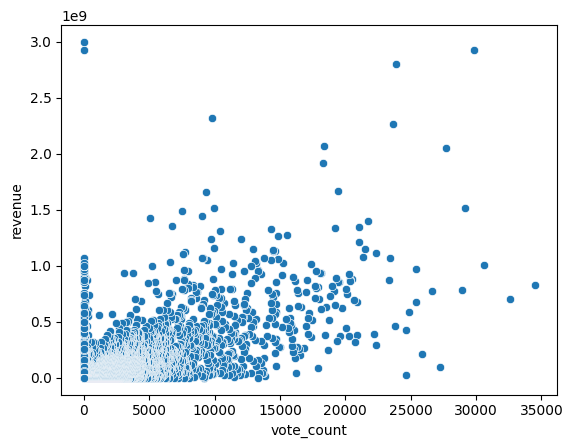

In [ ]:
#Question 18. Does revenue increase when vote_count increases?
# correlation of these two columns is calculated to be 0.72, which is pretty strong.
sns.scatterplot(data=released_movies, x='vote_count', y='revenue')
plt.show()

This plot shows that an increase in `vote_count` is generally associated with a rise in `revenue`. This relationship is further supported by a correlation coefficient of 0.72 between these columns, confirming the hypothesis.

In [ ]:
#Question 19. Top 5 countries with highest rated movies?
countries = released_movies.sort_values(by='vote_count', ascending=False)['production_countries'].str.split(',').explode().str.strip()
merged_data = released_movies.merge(countries, how='inner', left_index=True, right_index=True)
merged_data.groupby('production_countries_y')['vote_average'].mean().sort_values(ascending=False).head(5)

,vote_average
production_countries_y,
Western Sahara,7.433333
Zaire,6.200000
Algeria,5.725801
French Polynesia,5.449321
British Indian Ocean Territory,5.433333


In [ ]:
released_movies[released_movies.production_countries.str.contains('United States of America')==True]['vote_average'].mean()

3.183644950098457

In [ ]:
(released_movies[released_movies.production_countries.str.contains('United States of America')==True]['vote_average']==0).sum()

84092

We arrive at this result because there are fewer movies available for those countries, which does not accurately reflect the true outcome of the question. By filtering the data based on specific conditions, such as the number of movies per country and vote count, we can achieve more accurate results in this case.


## Conclusion and Areas of Future Work

Our exploratory data analysis has provided valuable insights into the movie dataset by categorizing movies based on their status—released, in production, post prodution, rumored or canceled. Focusing on the released movies, we identified several key trends:

- **Zero Values in Numeric Columns**: Many numeric columns contain zeros that may not accurately reflect true values, raising concerns about data quality.

- **Language Distribution**: The majority of movies are in English, followed by French, Spanish, German, and Japanese, indicating a potential bias in the dataset toward English-language films.

- **Misrecorded Release Dates**: A notable number of movies are incorrectly logged as released in January, suggesting issues with data entry that require further investigation.

- **Classification of Adult Films**: While a significant portion of movies is classified as adult films, the dataset lacks sufficient supporting information, calling into question the reliability of this classification.

- **Release Patterns**: Most movies are released on Fridays, reflecting industry norms and marketing strategies.

- **Correlation Analysis**: Most columns show weak correlations, but `revenue` and `vote_count` exhibit a strong correlation, as do `budget` and `revenue`. Interestingly, the weak correlation between `vote_average` and `popularity` indicates that higher ratings do not always lead to increased popularity.

In summary, while our analysis has revealed several intriguing trends and relationships within the dataset, it also highlights several areas that require further exploration. These include addressing issues related to missing data, identifying anomalies and outliers, and improving the accuracy of certain classifications. By tackling these challenges, we can deepen our understanding and interpretation of the dataset, ultimately leading to more informed conclusions and recommendations.
